# PART 2: EXTRACT - TRANSFORM - LOAD (ELT)



### Preliminary Steps

**Import Packages & Load Data**

In [35]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
# Load data
df_fake = pd.read_csv('fake.csv')
df_real = pd.read_csv('true.csv')

Since we have two seperate files, we will have to extract labels from the dataset and then merge then into one file. Therefore, we will execute those steps:

    1. Generate labels: True = 1 & Fake = 0
    2. Merge df_fake and df_real into df
    3. Extract features we are going to use "Title" & "Text"    
    
### Generate Labels | FAKE = 0 & REAL = 1

In [17]:
# Generate label for fake news - FAKE = 0
df_fake['label'] = [0 for i in range(len(df_fake))]

# Generate label for real news - REAL = 1
df_real['label'] = [1 for i in range(len(df_real))]

### Merge two dataframe


In [73]:
# union two dataframes of real news and fake news
df = df_fake.append(df_real)

# shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

# Show the data
df.head()

,title,text,subject,date,label
0,EU's new eastern leaders stick to guns on refu...,BRUSSELS (Reuters) - The new prime ministers o...,worldnews,"December 14, 2017",1
1,North Korean defector pushes diplomatic soluti...,WASHINGTON (Reuters) - A rare high-level defec...,worldnews,"November 1, 2017",1
2,South Africa court says cannot compel Zuma to ...,JOHANNESBURG (Reuters) - A South African High ...,worldnews,"September 29, 2017",1
3,Trump brand to exit Toronto skyline after buyo...,TORONTO (Reuters) - The name Trump will be rem...,politicsNews,"June 27, 2017",1
4,Baby banned from Japanese municipal assembly,TOKYO (Reuters) - A baby brought into a Japane...,worldnews,"November 24, 2017",1


### Extract Features (Title, Text & Label)

In [74]:
df = df.drop(['subject', 'date'], axis=1)
df.head()

,title,text,label
0,EU's new eastern leaders stick to guns on refu...,BRUSSELS (Reuters) - The new prime ministers o...,1
1,North Korean defector pushes diplomatic soluti...,WASHINGTON (Reuters) - A rare high-level defec...,1
2,South Africa court says cannot compel Zuma to ...,JOHANNESBURG (Reuters) - A South African High ...,1
3,Trump brand to exit Toronto skyline after buyo...,TORONTO (Reuters) - The name Trump will be rem...,1
4,Baby banned from Japanese municipal assembly,TOKYO (Reuters) - A baby brought into a Japane...,1


### Distribution of Classes

DISTRIBUTION OF CLASSES (LABEL) IN THE DATASET (%):
0    52.3
1    47.7
Name: label, dtype: float64


Text(0.5, 1.0, 'Distribution of Classes')

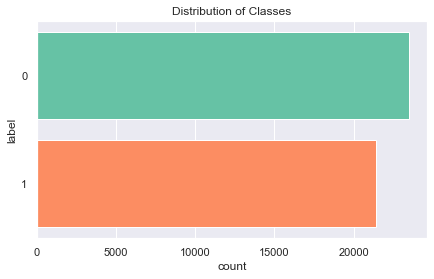

In [83]:
print('DISTRIBUTION OF CLASSES (LABEL) IN THE DATASET (%):')
print(round((df.label.value_counts()/len(df.label))*100,2))

# Plotting the distribution of classes
plt.figure(figsize=(7,4))
sns.set(style="darkgrid")
sns.countplot(y='label', data=df, palette='Set2', saturation=1).set_title('Distribution of Classes')

In general, the classes are equally distributed. We don't have any problem with imbalanced classes

### Save the data

In [84]:
df.to_csv('clean_data.csv')